## DTSC 2301 Spring 2025 Homework #1

Turn in your assignment via Gradescope

Due 1/17/25, 11: 59pm

For this assignment you may *not* use any generative AI and you may only use python commands and code we used in class.

#### Question 1
Read in the Penguins dataset (https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv).  Create a violinplot for penguin body mass.

In [3]:
# Load in packages we need for doing graphical representations.  
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors

import scipy.stats as stats



In [17]:
# read in the data to dataframe called ames
ames = pd.read_csv(("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv"), na_values=['?'])
# replace the ? in the data with NaN for missing values
ames.replace(['?'],np.NaN)
# show information about the dataframe
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


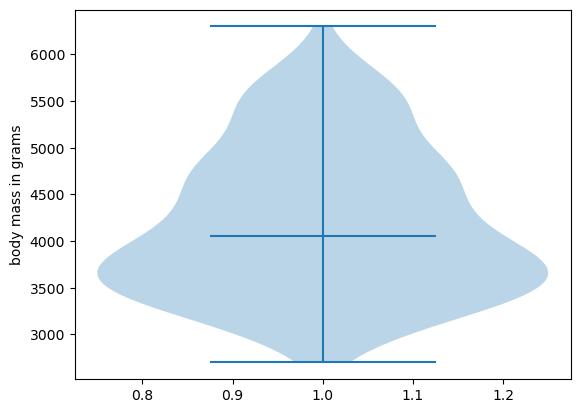

In [25]:
plt.violinplot(ames['body_mass_g'], showmedians=True, showextrema=True)
plt.ylabel('body mass in grams')
plt.show()


#### Question 2
Again using the data on body mass of penguins, create and interpret a 95% confidence interval for the mean body weight of a penguin based upon this sample.  

In [34]:
# create 95% confidence interval for population mean
body_mass_g = ames['body_mass_g']
print("Mean of the body mass in grams is ", np.round(np.mean(ames['body_mass_g']),2))
stats.t.interval(confidence=0.95, 
              df=len(body_mass_g)-1, 
              loc=np.mean(body_mass_g),  
              scale=stats.sem(body_mass_g)) 

Mean of the body mass in grams is  4201.75


(4116.458332024052, 4287.050439905773)

In this model, I am 95% confident that the true mean body mass in grams for penguins is between 4,116.46 and 4,287.05 grams. The mean body mass in grams for penguins is 4,201.75 grams. 

#### Question 3
Using the Ames Housing Data (https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv), create a 92% confidence interval for the mean above grade (ground) living area square feet (GrLivArea).  Interpret this interval in the context of these data.

In [35]:
# read in the data to dataframe called ames
ames = pd.read_csv(("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv"), na_values=['?'])
# replace the ? in the data with NaN for missing values
ames.replace(['?'],np.NaN)
# show information about the dataframe
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [39]:
above_grade_living_area = ames['GrLivArea']
print("Mean of the above grade living area in square feet", np.round(np.mean(ames['GrLivArea']),2))
stats.t.interval(confidence=0.92, 
              df=len(above_grade_living_area)-1, 
              loc=np.mean(above_grade_living_area),  
              scale=stats.sem(above_grade_living_area)) 

Mean of the above grade living area in square feet 1515.46


(1491.3706943731436, 1539.5567028871305)

In this model, I am 92% confident that the true mean above grade living area in square feet is between 1,491.37 and 1,539.56 square feet. The mean above grade living area in square feet is 1,515.46 square feet. 

#### Question 4
Using the Ames Housing Data, create a 90% confidence interval for the standard deviation of Sale Price using the bootstrap.  Interpret this interval in the context of these data.

In [4]:
# read in the data to dataframe called ames
house_data = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv")
# remove rows with missing data
house_data.dropna(inplace=True)
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,?,Reg,Lvl,AllPub,...,0,?,?,?,0,2,2008,WD,Normal,208500
2,3,60,RL,68,11250,Pave,?,IR1,Lvl,AllPub,...,0,?,?,?,0,9,2008,WD,Normal,223500
4,5,60,RL,84,14260,Pave,?,IR1,Lvl,AllPub,...,0,?,?,?,0,12,2008,WD,Normal,250000
6,7,20,RL,75,10084,Pave,?,Reg,Lvl,AllPub,...,0,?,?,?,0,8,2007,WD,Normal,307000
7,8,60,RL,?,10382,Pave,?,IR1,Lvl,AllPub,...,0,?,?,Shed,350,11,2009,WD,Normal,200000


In [5]:
#make a object that is just the sale price for houses
np.random.seed()
sale_price = house_data['SalePrice'].dropna()
std_sale_price = np.std(sale_price)
print("standard deviation of sale price in the original data is", np.std(sale_price))
# get and store the total number of 
n_sale_price=len(sale_price)
# n_reps is the number of bootstrap replicates 
n_reps = 5000

# create an empty array to store the calculated means
boot_means = []
# loop through taking a sample and calculating a standard deviation from the sample n_reps times
for i in range(n_reps):
  # create a sample with replacement of size n_sale_price from sale_price
  house_sale_price = np.random.choice(sale_price.tolist(), n_sale_price)
  # calculate the mean of the values in house_sale_price and save in std
  std = np.std(house_sale_price)
  # add std to the list of other bootstrapped means
  boot_means.append(std)

# print the standard deviation of the bootstrapped means, boot_means
print("Standard Deviation of the bootstrapped standard deviation is", np.std(boot_means))
# take the 5th percentile and the 95th percentile of the bootstrapped means to make a 90% confidence interval
np.percentile(boot_means,[5, 95])


standard deviation of sale price in the original data is 89143.40492378542
Standard Deviation of the bootstrapped standard deviation is 4555.656424833503


array([81678.56250416, 96716.9865313 ])

In this model, I am 90% confident that the standard deviation of sale price is between $81,678.56 and $96,716.97. The standard deviation of the bootstrapped standard deviation is $4,555.66. 

#### Question 5
Write a short 80-120 word paragraph explaining how data scientists should ensure that the analysis and its interpretation that you made about the Ames Housing Data do not inadvertently reinforce bias or inequalities in the housing market.


Data Scientists can make sure that the housing data analysis and its interpretation do not reinforce bias or inequalities by using a higher confidence interval or by using less data points. For example, if you use a 95% confidence interval instead of a 90% confidence interval, you will get a more precise interval that fits the data better. The confidence level tells you how accurate the level fits the data so data scientists should use a higher confidence interval to prevent outliers or other kinds of bias from ruining the interval. In addition, using less data points gives you a more accurate interval since it will get rid of outliers if outliers were throwing off the interval. If you have more points included in the interval, there is a higher chance that a data point could be an outlier versus a smaller interval. 